# Fake News Detection Project

!(D:\Machine learning Projects\Fake News Detection.png)



## Overview

This project implements a machine learning pipeline for detecting fake news articles. The pipeline includes data preprocessing, TF-IDF vectorization, model training with several classifiers, and evaluation of model performance.

## Project Structure

- `Fake.csv`: Dataset containing fake news articles.
- `True.csv`: Dataset containing real news articles.
- `main.ipynb`: Python script with the main code for data processing, model training, and evaluation.
- `README.md`: This file.




In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## 1. Data Preparation

### Loading Data


In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')


In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Adding Class Labels

In [5]:
data_fake["class"] = 0
data_true["class"] = 1

In [6]:
data_fake.shape , data_true.shape

((23481, 5), (21417, 5))

### Manual Testing Data

In [7]:
# For the fake dataset
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis=0, inplace=True)

# For the true dataset
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)


In [8]:
data_fake.shape , data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\muham\AppData\Local\Temp\ipykernel_3836\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\muham\AppData\Local\Temp\ipykernel_3836\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [10]:
data_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [11]:
data_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


### Merging Datasets

In [12]:
data_merge = pd.concat([data_fake, data_true], axis= 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
data_merge.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Dropping Unnecessary Columns

In [15]:
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

### Handling Missing Values

In [16]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
data= data.sample(frac=1)

In [18]:
data.head()

,text,class
9268,Sarah Sanders announced during the White House...,0
14063,ATHENS (Reuters) - Several hundred elderly Gre...,1
8336,Republicans in Congress are holding up a measu...,0
18016,Wow! What a nice family A man s parents flew o...,0
2200,"Oh, the wiretapping scandal. Or it would be a ...",0


### Shuffling Data

In [19]:
data.reset_index(inplace= True)
data.drop(['index'], axis=1, inplace=True) 

In [20]:
data.head()

,text,class
0,Sarah Sanders announced during the White House...,0
1,ATHENS (Reuters) - Several hundred elderly Gre...,1
2,Republicans in Congress are holding up a measu...,0
3,Wow! What a nice family A man s parents flew o...,0
4,"Oh, the wiretapping scandal. Or it would be a ...",0


## 2. Data Preprocessing

### Text Cleaning Function

In [21]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]', '', text)
    text = re.sub('\\W', " " , text)
    text = re.sub('https?://\S+|www\. \S+', '', text)
    text = re.sub('<.*?>+', '' , text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n', '' , text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\muham\AppData\Local\Temp\ipykernel_3836\1990745505.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]', '', text)
C:\Users\muham\AppData\Local\Temp\ipykernel_3836\1990745505.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\. \S+', '', text)
C:\Users\muham\AppData\Local\Temp\ipykernel_3836\1990745505.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


### Applying Text Cleaning

In [22]:
data['text'] = data['text'].apply(wordopt)

In [23]:
x = data['text']
y = data['class']

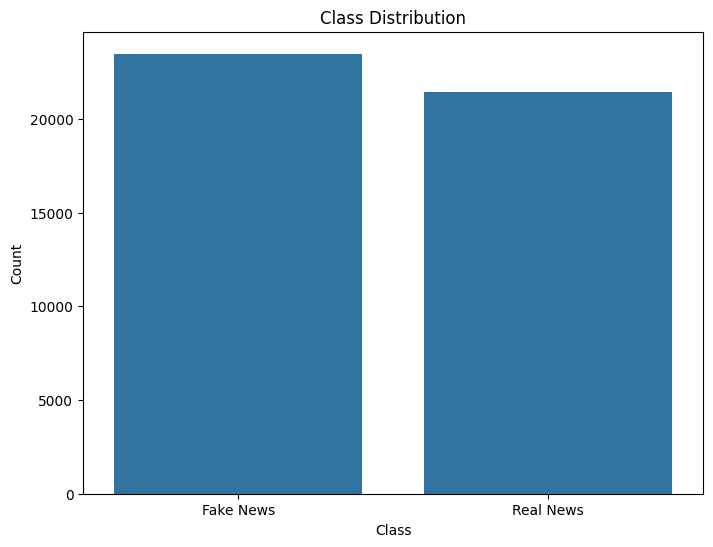

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data_merge)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake News', 'Real News'])
#plt.savefig('images/class_distribution.png')
plt.show()


## Splitting DataSet(75/25) ratio

In [24]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25)

## 3. Feature Extraction

### TF-IDF Vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization =TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

<Figure size 1000x800 with 0 Axes>

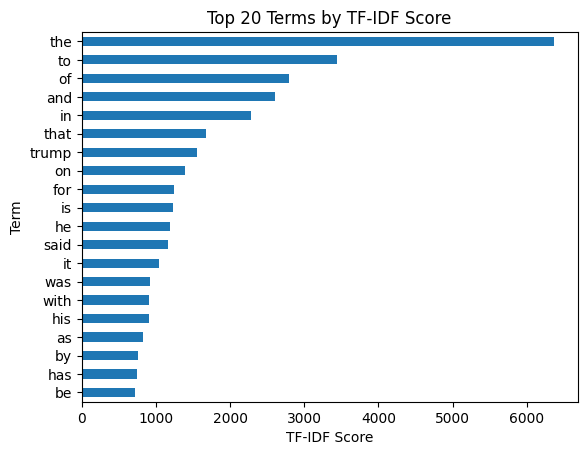

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names
feature_names = vectorization.get_feature_names_out()

# Sum up TF-IDF scores for each term
term_scores = np.asarray(xv_train.sum(axis=0)).flatten()
term_scores_df = pd.DataFrame({'term': feature_names, 'score': term_scores})
top_terms = term_scores_df.sort_values(by='score', ascending=False).head(20)

# Plot top terms
plt.figure(figsize=(10, 8))
top_terms.plot(kind='barh', x='term', y='score', legend=False)
plt.title('Top 20 Terms by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.gca().invert_yaxis()
#plt.savefig('images/top_terms_tfidf.png')
plt.show()


### 4. Model Training and Evaluation

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
lr = LogisticRegression()


In [28]:
lr.fit(xv_train, y_train)


LogisticRegression()

In [29]:
pred_lr = lr.predict(xv_test)
pred_lr

array([0, 1, 0, ..., 0, 0, 0])

In [30]:
lr.score(xv_test, y_test)

0.9879679144385026

In [31]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      5297

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [33]:
pred_dt = dt.predict(xv_test)

In [34]:
dt.score(xv_test, y_test)

0.9952762923351158

In [35]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       1.00      0.99      0.99      5297

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state =0 )
gb.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
pred_gb = gb.predict(xv_test)

In [38]:
gb.score(xv_test, y_test)

0.9948306595365419

In [39]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5923
           1       0.99      1.00      0.99      5297

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xv_test, y_test)

RandomForestClassifier()

In [41]:
pred_rf = rf.predict(xv_test)

In [42]:
rf.score(xv_test, y_test)

1.0

In [43]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      5297

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Model Performance Comparison

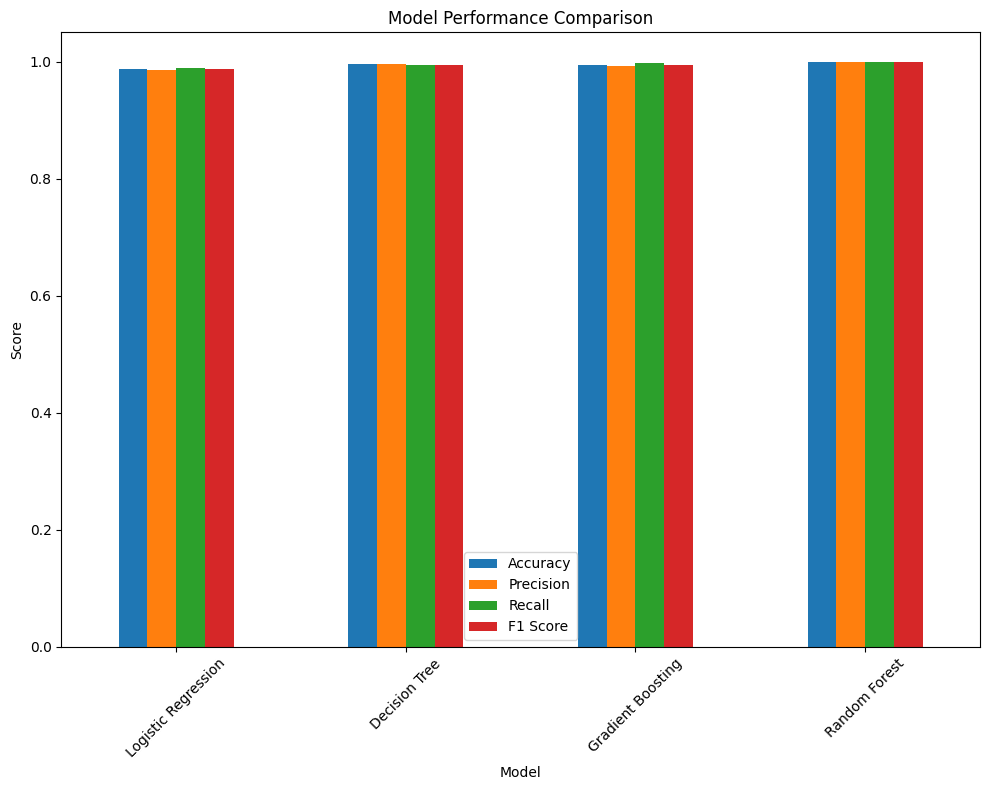

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate performance metrics
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [lr.score(xv_test, y_test), dt.score(xv_test, y_test), gb.score(xv_test, y_test), rf.score(xv_test, y_test)],
    'Precision': [precision_score(y_test, pred_lr), precision_score(y_test, pred_dt), precision_score(y_test, pred_gb), precision_score(y_test, pred_rf)],
    'Recall': [recall_score(y_test, pred_lr), recall_score(y_test, pred_dt), recall_score(y_test, pred_gb), recall_score(y_test, pred_rf)],
    'F1 Score': [f1_score(y_test, pred_lr), f1_score(y_test, pred_dt), f1_score(y_test, pred_gb), f1_score(y_test, pred_rf)]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

metrics_df.plot(kind='bar', figsize=(10, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('images/model_comparison.png')
plt.show()


In [45]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news_samples):
    # Prepare the test data as a DataFrame
    testing_news = {"text": news_samples}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    
    # Transform the new test data using the fitted vectorizer
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    # Get predictions from each model
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dt.predict(new_xv_test)
    pred_GBC = gb.predict(new_xv_test)
    pred_RFC = rf.predict(new_xv_test)

    # Print the results
    for i, sample in enumerate(news_samples):
        print(f"\nNews Sample {i+1}: '{sample}'")
        print(f"LR Prediction: {output_label(pred_LR[i])}")
        print(f"DT Prediction: {output_label(pred_DT[i])}")
        print(f"GBC Prediction: {output_label(pred_GBC[i])}")
        print(f"RFC Prediction: {output_label(pred_RFC[i])}")

# Define news samples to test
news_samples = [
    "The stock market crashed due to unforeseen events.",
    "Celebrity gossip about a new movie release.",
    "New scientific breakthrough in renewable energy.",
    "Political scandal involving high-profile figures."
]

# Call the manual_testing function with predefined samples
manual_testing(news_samples)



News Sample 1: 'The stock market crashed due to unforeseen events.'
LR Prediction: Fake News
DT Prediction: Fake News
GBC Prediction: Fake News
RFC Prediction: Fake News

News Sample 2: 'Celebrity gossip about a new movie release.'
LR Prediction: Fake News
DT Prediction: Fake News
GBC Prediction: Fake News
RFC Prediction: Fake News

News Sample 3: 'New scientific breakthrough in renewable energy.'
LR Prediction: Fake News
DT Prediction: Fake News
GBC Prediction: Fake News
RFC Prediction: Fake News

News Sample 4: 'Political scandal involving high-profile figures.'
LR Prediction: Fake News
DT Prediction: Fake News
GBC Prediction: Fake News
RFC Prediction: Fake News
